# Librerias

In [1]:
import pandas as pd
import numpy as np
import utils as ut
import matplotlib.pyplot as plt
import lightgbm as lgbm
import sklearn as sk

# Cargar datos

In [2]:
# data = pd.read_csv("data/ARIA_cleaned/Sch.csv", index_col="ScheduledActivitySer")
data = pd.read_csv("data/ARIA_cleaned/Sch76_3.csv", index_col="ScheduledActivitySer")

In [3]:
data3, c_elim, f_elim = ut.quitar_nans(data, 0.5, 1, False)

Se eliminaron 21 columnas y 0 registros


In [4]:
elim = ["Duration", "DefaultDuration"]
data2 = data.drop(columns = elim)

# c_categ = ['HistologyCode', 'CityOrTownship', 'EquipmentSer', 'Technique', 'PrimaryPTVSer_isNaN', 'ActivityCategoryCode', 'CalcModelOptions', 'NotificationPriorTimeFlag_x', 'NoEditFlag_x', 'SkinFlashMargin', 'MultiFieldOptFlag', 'Country', 'DiagnosisCode_sec', 'ResourceGroupSer', 'NoFractions_isNaN', 'SummaryStage', 'ObjectStatus_sec', 'PrescribedPercentage', 'DiagnosisCode', 'FractionPatternDigitsPerDay', 'FractionPattern', 'Site', 'MStage', 'Sex', 'StartDelay', 'ScheduledActivityCode', 'NotificationPriorTime_y', 'Intent', 'ObjectStatus_y_4', 'TreatmentIntentType', 'CalcModelOptionsLen', 'Status_x', 'PhaseType', 'Notes', 'Status_y', 'DicomSeqNumber', 'SimulationNeeded', 'TumorSize_isNaN', 'PrescribedDose_isNaN', 'DateOfBirth_isNaN', 'TStage', 'Duration', 'NotificationPriorTimeFlag_y', 'PlanNormMethod', 'NumberOfFractions', 'PlanNormFactor_isNaN', 'Description', 'TreatmentOrientation', 'HistologyCode_sec', 'Priority', 'PatientStatus', 'AssignableFlag', 'ActivityCode', 'NotificationPriorTime_x', 'DefaultDuration', 'NStage', 'ClinicalStatus', 'InterfaceStamp']
c_categ = ['SchedulableFlag', 'NotificationPriorTimeFlag_y', 'TumorSize_isNaN', 'NotificationPriorTime_y', 'NStage', 'DateOfBirth_isNaN', 'Priority', 'PrescribedDose_isNaN', 'NotificationPriorTime_x', 'ClinicalStatus', 'TreatmentOrientation', 'Status_x', 'AnchorActivityFlag', 'SkinFlashMargin', 'ObjectStatus_y_4', 'TreatmentOrder', 'CityOrTownship', 'Technique', 'Intent', 'TreatmentIntentType', 'AssignableFlag', 'ActivityCode', 'CalcModelOptions', 'StartDelay_isNaN', 'ActivityCategoryCode', 'PrimaryPTVSer_isNaN', 'ResourceGroupSer', 'InterfaceStamp', 'ObjectStatus_sec', 'Sex', 'HistologyCode_sec', 'Description', 'Notes', 'EquipmentSer', 'HistologyCode', 'ScheduledActivityCode', 'DiagnosisCode_sec', 'FractionPattern', 'MStage', 'NotificationPriorTimeFlag_x', 'BolusThickness', 'Site', 'Country', 'PlanNormMethod', 'SummaryStage', 'ActualMachineSer', 'PrescribedPercentage', 'NoEditFlag_x', 'Status_y', 'Duration', 'SimulationNeeded', 'DiagnosisCode', 'NoEditFlag_y', 'TStage', 'DefaultDuration', 'PatientStatus', 'DicomSeqNumber', 'NumberOfFractions_isNaN', 'PhaseType', 'MultiFieldOptFlag', 'FractionPatternDigitsPerDay']
c_categ = ['Intent', 'NoOfFractions_isNaN', 'DefaultDuration', 'SkinFlashMargin', 'PrescribedDose_isNaN', 'DateOfBirth_isNaN', 'TreatmentIntentType', 'InterfaceStamp', 'FractionPatternDigitsPerDay', 'ClinicalStatus', 'NoEditFlag_x', 'CityOrTownship', 'FractionPattern', 'Notes', 'Duration', 'SimulationNeeded', 'DiagnosisCode', 'SchedulableFlag', 'HistologyCode_sec', 'PhaseType', 'ResourceGroupSer', 'ScheduledActivityCode', 'TreatmentOrientation', 'NoFractions_isNaN', 'Sex', 'TreatmentOrder', 'DiagnosisCode_sec', 'Site', 'EquipmentSer', 'PrescribedPercentage', 'ObjectStatus_sec', 'TStage', 'NotificationPriorTime_x', 'SummaryStage', 'StartDelay_isNaN', 'Status_x', 'PatientStatus', 'NotificationPriorTimeFlag_x', 'NotificationPriorTimeFlag_y', 'ActualMachineSer', 'AnchorActivityFlag', 'Country', 'DicomSeqNumber', 'ObjectStatus_y_4', 'Description', 'NoEditFlag_y', 'Priority', 'MStage', 'Status_y', 'CalcModelOptions', 'BolusThickness', 'NumberOfFractions_isNaN', 'NotificationPriorTime_y', 'HistologyCode', 'ActivityCategoryCode', 'PlanNormMethod', 'Technique', 'AssignableFlag', 'PlanNormFactor_isNaN', 'PrimaryPTVSer_isNaN', 'ActivityCode', 'NStage', 'TumorSize_isNaN', 'CalcModelOptionsLen_isNaN', 'MultiFieldOptFlag']
c_categ = ['Sex', 'ActivityCode', 'TreatmentOrder', 'NoEditFlag_cat', 'BolusThickness', 'Site', 'PrescribedPercentage', 'CalcModelOptions', 'NoEditFlag_sch', 'HistologyCode_sec', 'EquipmentSer', 'NStage', 'PhaseType', 'TechniqueSer', 'MStage', 'ObjectStatus_cur', 'AnchorActivityFlag', 'NotificationPriorTime_sch', 'Country', 'NumberOfFractions_isNaN', 'TreatmentIntentType', 'DateOfBirth_isNaN', 'Notes', 'NotificationPriorTimeFlag_sch', 'CityOrTownship', 'EnergyModeSer', 'DefaultDuration', 'Status_rtpps', 'NotificationPriorTime_a', 'SkinFlashMargin', 'SummaryStage', 'PatientStatus', 'PlanNormMethod', 'Duration', 'DicomSeqNumber', 'ObjectStatus_sec', 'ResourceGroupSer', 'HistologyCode', 'TumorSize_isNaN', 'Priority', 'SchedulableFlag', 'ScheduledActivityCode', 'ActualMachineSer', 'TStage', 'Technique', 'Status_pres', 'StartDelay_isNaN', 'ActivityCategoryCode', 'FractionPattern', 'InterfaceStamp', 'PrescribedDose_isNaN', 'TreatmentOrientation', 'MultiFieldOptFlag', 'AssignableFlag', 'DiagnosisCode', 'PrimaryPTVSer_isNaN', 'Intent', 'FractionPatternDigitsPerDay', 'NumFields', 'ClinicalStatus', 'SimulationNeeded', 'NotificationPriorTimeFlag_a', 'Description', 'DiagnosisCode_sec']
c_categ = list(set(c_categ) - set(elim))

# Train/test

In [5]:
le = sk.preprocessing.LabelEncoder()
for i in c_categ:
    data2.loc[:,i] = le.fit_transform( data2[i].astype(str) )

In [6]:
def train_test(data, train_size, target):
    np.random.seed(5)
    i = np.random.choice(range(len(data)), size=round(len(data)*train_size), replace=False)
    j = np.setdiff1d(range(len(data)), i)

    y_tr = data[target].iloc[i]
    y_te = data[target].iloc[j]
    x_tr = data.iloc[i,:].drop(columns = target)
    x_te = data.iloc[j,:].drop(columns = target)

    return (x_tr, y_tr, x_te, y_te, i, j)
    

(x_tr, y_tr, x_te, y_te, i, j) = train_test(data2, 0.7, "ActualDuration")
# (x_tr, y_tr, x_te, y_te, i, j) = train_test(data2, 0.7, "ScheduledDuration")
print(len(x_tr))
print(len(x_te))

53524
22939


In [7]:
train = lgbm.Dataset(x_tr, label = y_tr, categorical_feature = c_categ )
test  = lgbm.Dataset(x_te, label = y_te, categorical_feature = c_categ )

In [8]:
parameters = {
    'objective': 'regression',
    'metric': ['rmse'],
#     'metric': ['poisson'],
    'boosting': 'gbdt',
    'learning_rate': 0.1,
    'verbose': 1,
#     'force_col_wise': 'true',
    
    # params util to prevent overfitting:
#     'feature_fraction': 0.4,
#     'bagging_fraction': 0.4,
#     'bagging_freq': 8,
    'num_leaves': 60,
#     'path_smooth': 10,
#     'lambda_l1': 100,
#     'lambda_l2': 100,
#     'min_data_in_leaf': 10,
#     'max_depth': 20,
    
#     'max_bin': 255,
#     'min_data_in_bin': 3,
}

model = lgbm.train(parameters, train, categorical_feature = c_categ, 
                       valid_sets = [test, ],
                       num_boost_round = 5000,
                       early_stopping_rounds = 200,
                  )
# 4.28

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1639
[LightGBM] [Info] Number of data points in the train set: 53524, number of used features: 71
[LightGBM] [Info] Start training from score 15.421608
[1]	valid_0's rmse: 6.77489
Training until validation scores don't improve for 200 rounds
[2]	valid_0's rmse: 6.51794
[3]	valid_0's rmse: 6.29551
[4]	valid_0's rmse: 6.10859
[5]	valid_0's rmse: 5.94797
[6]	valid_0's rmse: 5.81127
[7]	valid_0's rmse: 5.69718
[8]	valid_0's rmse: 5.5994

D:\miniconda3\envs\tfm2\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
D:\miniconda3\envs\tfm2\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[9]	valid_0's rmse: 5.51347
[10]	valid_0's rmse: 5.44146
[11]	valid_0's rmse: 5.37728
[12]	valid_0's rmse: 5.32128
[13]	valid_0's rmse: 5.27554
[14]	valid_0's rmse: 5.23462
[15]	valid_0's rmse: 5.19981
[16]	valid_0's rmse: 5.16864
[17]	valid_0's rmse: 5.14069
[18]	valid_0's rmse: 5.11698
[19]	valid_0's rmse: 5.09401
[20]	valid_0's rmse: 5.07144
[21]	valid_0's rmse: 5.05264
[22]	valid_0's rmse: 5.03222
[23]	valid_0's rmse: 5.01572
[24]	valid_0's rmse: 4.99977
[25]	valid_0's rmse: 4.98752
[26]	valid_0's rmse: 4.97258
[27]	valid_0's rmse: 4.96093
[28]	valid_0's rmse: 4.9518
[29]	valid_0's rmse: 4.94167
[30]	valid_0's rmse: 4.9302
[31]	valid_0's rmse: 4.91847
[32]	valid_0's rmse: 4.90887
[33]	valid_0's rmse: 4.90034
[34]	valid_0's rmse: 4.89249
[35]	valid_0's rmse: 4.88365
[36]	valid_0's rmse: 4.87498
[37]	valid_0's rmse: 4.86689
[38]	valid_0's rmse: 4.85873
[39]	valid_0's rmse: 4.85068
[40]	valid_0's rmse: 4.84287
[41]	valid_0's rmse: 4.83471
[42]	valid_0's rmse: 4.82673
[43]	valid_0's r

[304]	valid_0's rmse: 4.54381
[305]	valid_0's rmse: 4.544
[306]	valid_0's rmse: 4.54368
[307]	valid_0's rmse: 4.5436
[308]	valid_0's rmse: 4.54356
[309]	valid_0's rmse: 4.54368
[310]	valid_0's rmse: 4.54362
[311]	valid_0's rmse: 4.54376
[312]	valid_0's rmse: 4.5438
[313]	valid_0's rmse: 4.54339
[314]	valid_0's rmse: 4.54345
[315]	valid_0's rmse: 4.5428
[316]	valid_0's rmse: 4.54237
[317]	valid_0's rmse: 4.54228
[318]	valid_0's rmse: 4.54264
[319]	valid_0's rmse: 4.54272
[320]	valid_0's rmse: 4.54217
[321]	valid_0's rmse: 4.54201
[322]	valid_0's rmse: 4.5417
[323]	valid_0's rmse: 4.54152
[324]	valid_0's rmse: 4.54097
[325]	valid_0's rmse: 4.54081
[326]	valid_0's rmse: 4.54078
[327]	valid_0's rmse: 4.54082
[328]	valid_0's rmse: 4.54036
[329]	valid_0's rmse: 4.53976
[330]	valid_0's rmse: 4.53966
[331]	valid_0's rmse: 4.53959
[332]	valid_0's rmse: 4.53934
[333]	valid_0's rmse: 4.5388
[334]	valid_0's rmse: 4.53898
[335]	valid_0's rmse: 4.53905
[336]	valid_0's rmse: 4.53902
[337]	valid_0's r

[579]	valid_0's rmse: 4.52825
[580]	valid_0's rmse: 4.52835
[581]	valid_0's rmse: 4.52838
[582]	valid_0's rmse: 4.52828
[583]	valid_0's rmse: 4.52825
[584]	valid_0's rmse: 4.52834
[585]	valid_0's rmse: 4.52843
[586]	valid_0's rmse: 4.52843
[587]	valid_0's rmse: 4.52829
[588]	valid_0's rmse: 4.52848
[589]	valid_0's rmse: 4.52861
[590]	valid_0's rmse: 4.52878
[591]	valid_0's rmse: 4.52894
[592]	valid_0's rmse: 4.52902
[593]	valid_0's rmse: 4.52888
[594]	valid_0's rmse: 4.52904
[595]	valid_0's rmse: 4.52913
[596]	valid_0's rmse: 4.52927
[597]	valid_0's rmse: 4.52937
[598]	valid_0's rmse: 4.52952
[599]	valid_0's rmse: 4.52966
[600]	valid_0's rmse: 4.52961
[601]	valid_0's rmse: 4.52968
[602]	valid_0's rmse: 4.52943
[603]	valid_0's rmse: 4.52937
[604]	valid_0's rmse: 4.52927
[605]	valid_0's rmse: 4.52941
[606]	valid_0's rmse: 4.52939
[607]	valid_0's rmse: 4.52943
[608]	valid_0's rmse: 4.52947
[609]	valid_0's rmse: 4.52948
[610]	valid_0's rmse: 4.52951
[611]	valid_0's rmse: 4.52959
[612]	vali

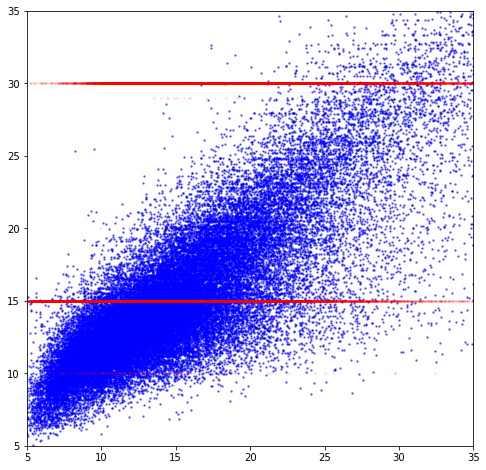

In [9]:
y_pred = model.predict(x_tr)

fig = plt.figure(1, figsize=(8,8))
plt.scatter(y_tr, y_pred, s = 2, alpha = 0.5, color = "blue")
plt.scatter(y_tr, data.ScheduledDuration.iloc[i], s = 2, alpha = 0.1, color = "red")

plt.xlim(5, 35)
plt.ylim(5, 35)
plt.show()

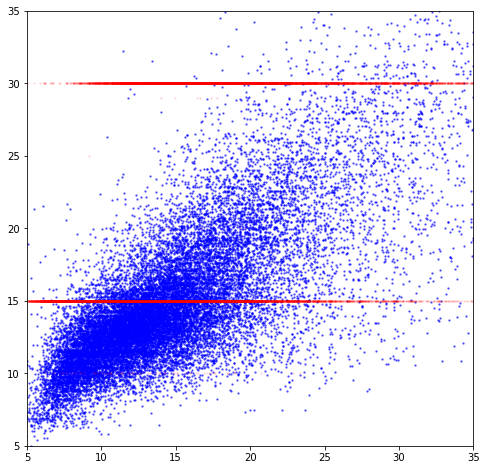

In [10]:
y_pred = model.predict(x_te)

fig = plt.figure(1, figsize=(8,8))
plt.scatter(y_te, y_pred, s=2, alpha = 0.5, color="blue")
plt.scatter(y_te, data.ScheduledDuration.iloc[j], s=2, alpha = 0.1, color="red")

plt.xlim(5, 35)
plt.ylim(5, 35)
plt.show()

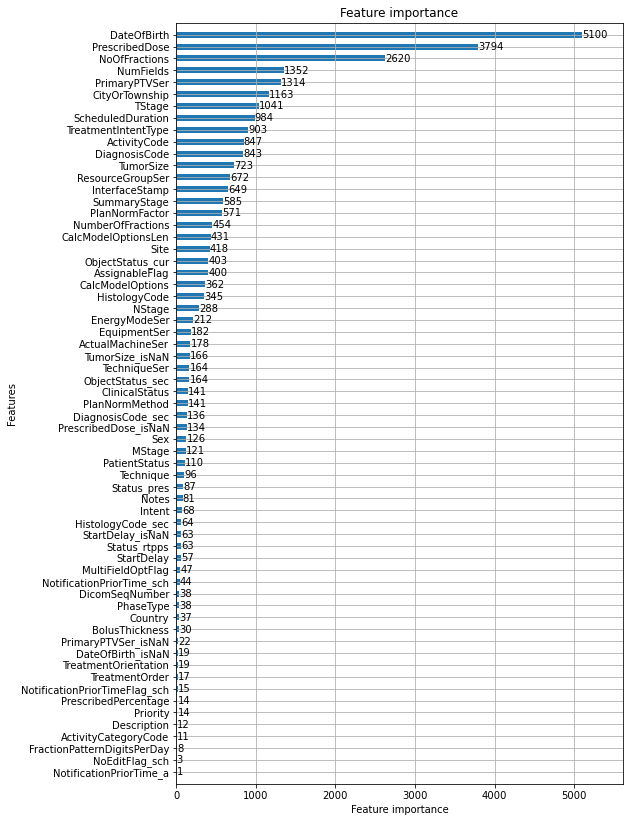

In [11]:
lgbm.plot_importance(model, height=0.5).figure.set_size_inches(8, 14)

<AxesSubplot:>

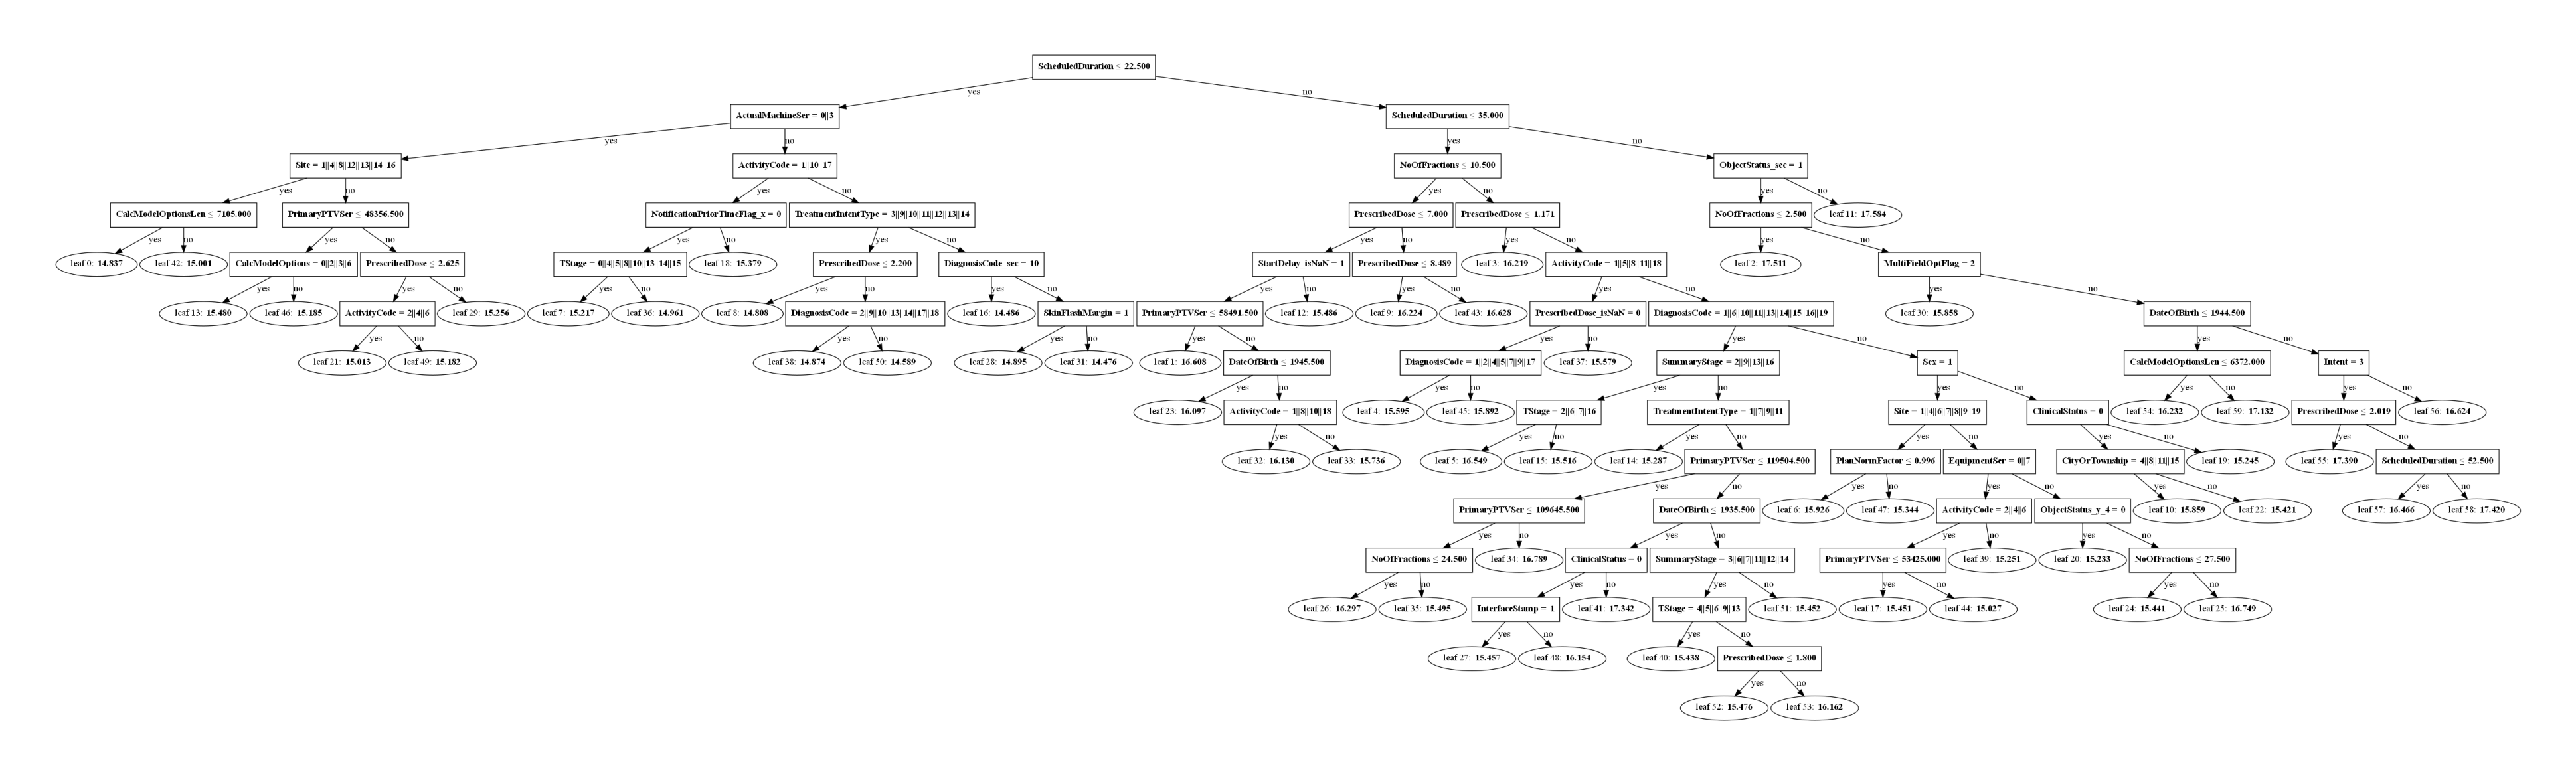

In [12]:
lgbm.plot_tree(model, tree_index = 0, orientation='vertical', dpi=800)

In [13]:
print(np.mean(y_pred))
print(np.mean(y_te))
print(np.mean(data.ScheduledDuration))

15.099316866318802
15.100202293836196
20.243609228885653


# Ex

In [ ]:
# uno = sch2.real[sch2.ActivityCode=="New Start"]
# dos = sch2.real[sch2.ActivityCode=="Fin Tratamiento"]
# tres= sch2.real
# # cua = sch2.real[sch2.ActivityCode=="Fin Tratamiento"]

# plt.hist(uno, bins=100, range=[0,40], density=True, alpha=0.5, color="red")
# plt.hist(dos, bins=100, range=[0,40], density=True, alpha=0.5, color="blue")
# plt.hist(tres,bins=100, range=[0,40], density=True, alpha=0.5, color="green")
# # plt.hist(cua ,bins=100, range=[0,40], density=True, alpha=0.5, color="yellow")
# plt.show()